### Bringing Trend Filtering into the Continous Domain

Recall Trend Filtering refers to the discrete optimization problem of 

$$ \min_{\mathbf{\beta }} \sum_{i=1}^{n} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j} \right)^{2}+\lambda \sum_{j=1}^{p} \left| \beta_{j}-\beta_{j-1} \right| $$

where $\lambda$ is a tuning parameter. The goal is to find a sequence of $\beta_j$ that minimizes the sum of squared residuals while also minimizing the sum of absolute differences between consecutive $\beta_j$. This is a convex optimization problem and can be solved using standard convex optimization techniques.

The solution is a discrete vector. To bring into the continous domain we utilize the falling factorial basis first suggested by [1]. 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../")
sys.path.append("../../")

from continous_tf import Continous_TF

from falling_factorial_gen import Falling_Factorial_Basis

from adaptive_tf import adaptive_tf
from cv_tf import cross_validation
from matrix_algorithms.difference_matrix import Difference_Matrix


### Generate Noisy Data

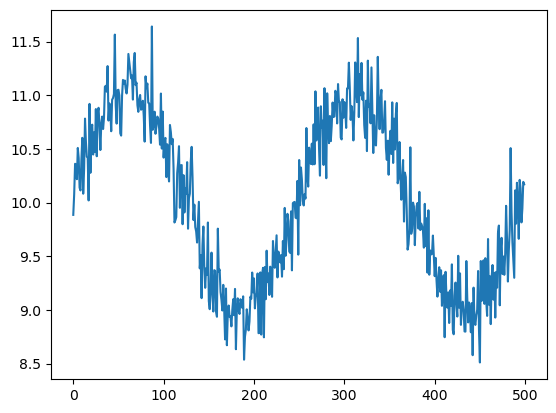

In [3]:
noisy_signal =np.sin(2*np.linspace(0, 2 * np.pi, 500)) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Sample TF Problem

Below we solve the TF problem for a sample of data. It utilizes a primal dual interior point method originally suggested by Boyd.

An exponentially spaced grid is used for potential lambda values. 1-fold cross validation is used to select the best lambda value. 

In [4]:
D=Difference_Matrix(500,1)
best_lambda=cross_validation(noisy_signal.reshape(-1,1),D,cv_folds=15,cv_iterations=1)

 WARNING Condition number is large: 1997698952.8353837
Performing  0 out of 1 iterations of cross validation
 WARNING Condition number is large: 1095290076.6497025
Performing cross validation for lambda = 0.26324972450992773
Performing cross validation for lambda = 0.5082556452404586
Performing cross validation for lambda = 0.981288019957844
Performing cross validation for lambda = 1.8945705515129525
Performing cross validation for lambda = 3.6578430610151424
Performing cross validation for lambda = 7.06218929051329
Performing cross validation for lambda = 13.634952824137631
Performing cross validation for lambda = 26.324972450992774
Performing cross validation for lambda = 50.82556452404586
Performing cross validation for lambda = 98.1288019957844
Performing cross validation for lambda = 189.45705515129504
Performing cross validation for lambda = 365.7843061015143
Performing cross validation for lambda = 706.218929051329
Performing cross validation for lambda = 1363.4952824137617
Perf

In [6]:
results=adaptive_tf(noisy_signal.reshape(-1,1),D,lambda_p=best_lambda)

### Let's Visualize results

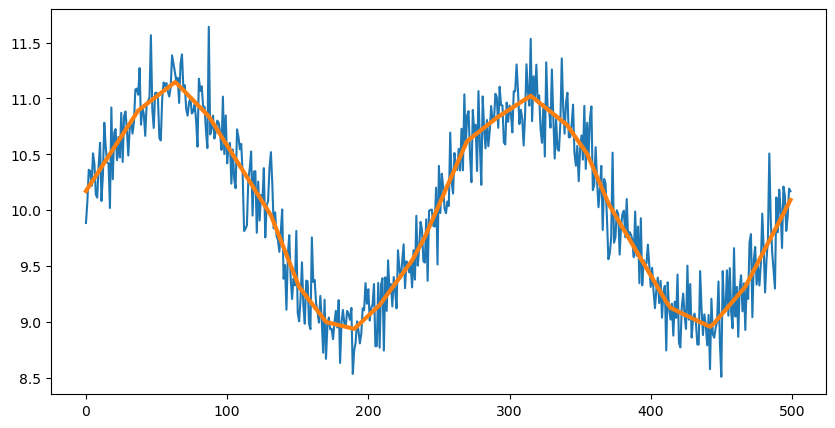

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)

### Construction of Falling Factorial Basis

The falling factorial basis has similar properties to splines and is constructed as follows:

$$ h_{j}(x)=\prod_{i=1}^{j-1} (x-x_l) \quad j=1, \ldots , k+1 $$
$$ h_{k+1+j}(x) = \prod_{i=1}^{k} (x-x_{j+l}) \ 1{x \geq x_{j+k}} \quad j=1 \ldots , n-k-1 $$

such that $h_1(x)=1$

The difference is that the falling factorial basis does not require continuity of derivatives at the knots

In [8]:
x_tf=results["sol"].x

t=np.arange(1,501)

ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [9]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [10]:
ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[10.17142204]
 [ 0.01947055]]
Number of theta coefficients: 498
Theta coefficients: [[-2.55226951e-11]
 [-6.25135499e-11]
 [-8.69384564e-11]
 [-1.00088826e-10]
 [-1.17186261e-10]
 [-1.08384413e-10]
 [-8.67164118e-11]
 [-8.27036217e-11]
 [-1.00449427e-10]
 [-1.13331566e-10]
 [-1.00856212e-10]
 [-1.20939703e-10]
 [-1.53823621e-10]
 [-1.44080303e-10]
 [-1.20715882e-10]
 [-1.02804876e-10]
 [-9.23758847e-11]
 [-1.33930200e-10]
 [-1.32052591e-10]
 [-1.62302172e-10]
 [-1.77752923e-10]
 [-1.73780990e-10]
 [-1.90816252e-10]
 [-2.03659312e-10]
 [-2.45117704e-10]
 [-2.52390109e-10]
 [-3.10496517e-10]
 [-3.45496076e-10]
 [-3.39881012e-10]
 [-3.38932438e-10]
 [-4.13715284e-10]
 [-5.31032995e-10]
 [-7.01803060e-10]
 [-1.17953824e-09]
 [-3.45588624e-09]
 [-3.75305493e-08]
 [-9.71266285e-03]
 [-8.03058420e-09]
 [-1.46102153e-09]
 [-8.90144847e-10]
 [-6.17253804e-10]
 [-4.86044982e-10]
 [-4.89007945e-10]
 [-4.88363128e-10]
 [-4.81977125e-10]
 [-4.5959680

In [11]:
x_tf[0]-x_tf[1]

array([-0.01947055])

In [12]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [104.55]])

### Let's Visualize the Coefficients

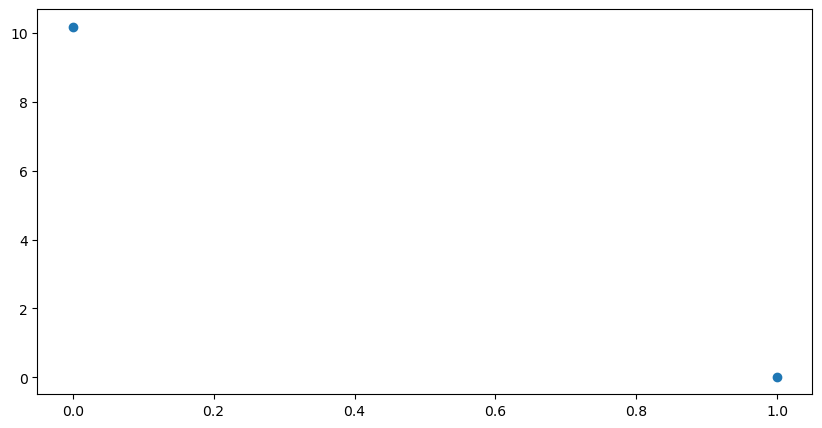

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

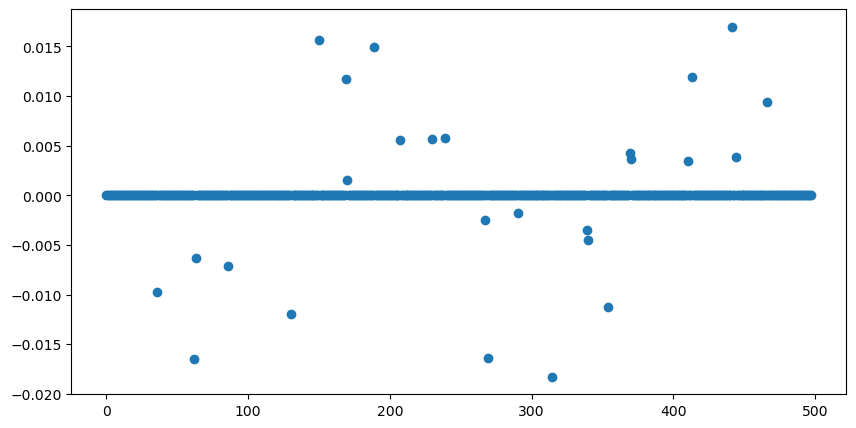

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

In [15]:
D=Difference_Matrix(500,0,t=np.arange(1,501))
D.D

array([[-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

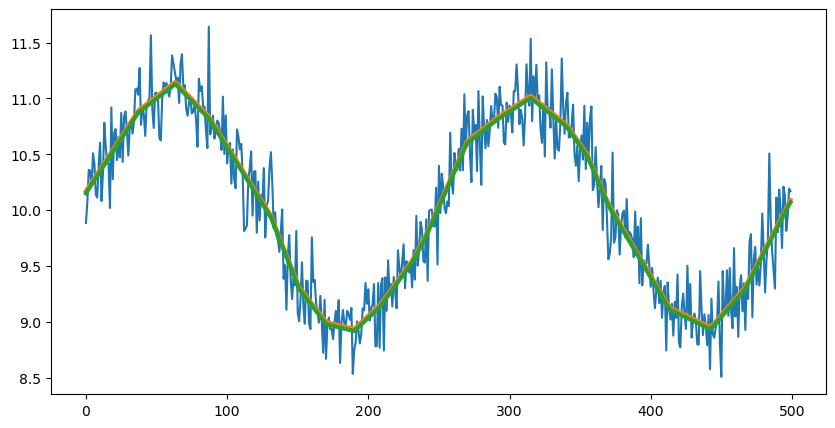

In [16]:
x_equal=np.arange(0,500)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)


### References

- The Falling Factorial Basis and Its Statistical Applications https://proceedings.mlr.press/v32/wange14.html
- Fast and Flexible ADMM Algorithms for Trend Filtering https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1054033
